# Лабораторная работа № 1
### Боровских Вадим, 932003

## B) Многоклассовый классификатор  fetal_health.csv


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
df = pd.read_csv("fetal_health.csv", quotechar='"', index_col = 0)
df=df.reset_index() 
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [23]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [24]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [25]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

1 - соответствует нормальному состоянию плода, 2 - подозрительному состоянию плода,3 - патология

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [27]:
risk_dictionary_multi_class = {2:2, 1:1, 3:3}

df['Target Multi'] = df['fetal_health'].map(risk_dictionary_multi_class)

In [28]:
df[['fetal_health','Target Multi']].head()

,fetal_health,Target Multi
0,2.0,2
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1


In [29]:
Xmc = df.drop(['fetal_health','Target Multi'],axis=1)
y = df['Target Multi']
y

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: Target Multi, Length: 2126, dtype: int64

In [30]:
print(y.isnull().sum())

0


#### Преобразование категориальных данных с помощью get_dummies и масштабирование данных:


In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
Xmc = min_max_scaler.fit_transform(Xmc)

In [32]:
from sklearn.model_selection import train_test_split
X_all_train, X_test, y_all_train, y_test = train_test_split(Xmc, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train : {X_all_train.shape}, Test : {X_test.shape}')

Train : (1700, 21), Test : (426, 21)


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, stratify=y_all_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (1360, 21), Test : (340, 21)


In [34]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

y_train shape: (1360, 4)
y_val shape: (340, 4)
y_test shape: (426, 4)


In [35]:
multi_classifier = Sequential()
multi_classifier.add(Dense(8,activation='relu',input_dim=21))
multi_classifier.add(Dense(4,activation='softmax'))

In [36]:
multi_classifier.compile(loss='categorical_crossentropy',optimizer='adam',
                          metrics='accuracy')

early_stop = EarlyStopping(monitor='val_accuracy',patience=15,mode='max',verbose=1)
checkpoint = ModelCheckpoint('C:/Users/vvadi/DeepLearning/multi_classifier-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

In [37]:
multi_classifier_history = multi_classifier.fit(X_train, y_train, batch_size=20,
                      validation_data=(X_val,y_val), epochs=50)

Epoch 1/50
68/68 [==============================] - 2s 12ms/step - loss: 1.1452 - accuracy: 0.5529 - val_loss: 0.8608 - val_accuracy: 0.7824
Epoch 2/50
68/68 [==============================] - 0s 5ms/step - loss: 0.7402 - accuracy: 0.7801 - val_loss: 0.6669 - val_accuracy: 0.7794
Epoch 3/50
68/68 [==============================] - 0s 5ms/step - loss: 0.6268 - accuracy: 0.7794 - val_loss: 0.5896 - val_accuracy: 0.7882
Epoch 4/50
68/68 [==============================] - 0s 5ms/step - loss: 0.5657 - accuracy: 0.7824 - val_loss: 0.5375 - val_accuracy: 0.7853
Epoch 5/50
68/68 [==============================] - 0s 6ms/step - loss: 0.5250 - accuracy: 0.7860 - val_loss: 0.4998 - val_accuracy: 0.7912
Epoch 6/50
68/68 [==============================] - 0s 5ms/step - loss: 0.4913 - accuracy: 0.7956 - val_loss: 0.4721 - val_accuracy: 0.7882
Epoch 7/50
68/68 [==============================] - 0s 5ms/step - loss: 0.4654 - accuracy: 0.8081 - val_loss: 0.4489 - val_accuracy: 0.8176
Epoch 8/50
68/68 [=

#### Построение графика потери

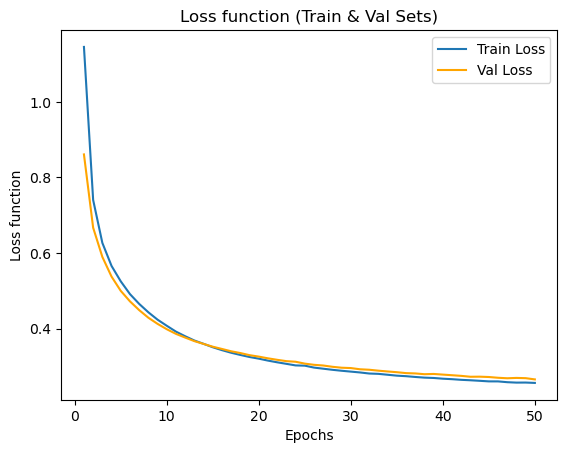

In [38]:
loss_function = multi_classifier_history.history['loss']
val_loss_function = multi_classifier_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

#### Построение графика точности

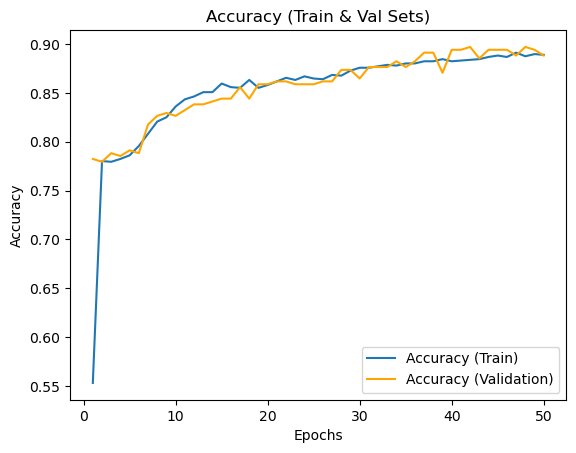

In [39]:
acc = multi_classifier_history.history['accuracy']
val_acc = multi_classifier_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
print(y_test[4])

[0. 1. 0. 0.]


In [50]:
x_test_pattern = X_test[4,:]
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
print(original_features)

y_pred = multi_classifier.predict(x_test_pattern.reshape(1,-1))


[[1.52e+02 0.00e+00 0.00e+00 5.00e-03 0.00e+00 0.00e+00 0.00e+00 6.20e+01
  4.00e-01 5.90e+01 5.60e+00 2.50e+01 1.36e+02 1.61e+02 0.00e+00 0.00e+00
  1.59e+02 1.56e+02 1.58e+02 1.00e+00 1.00e+00]]
1/1 [==============================] - 0s 58ms/step


In [51]:
from sklearn.preprocessing import label_binarize
import numpy as np

y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

In [52]:
X = Xmc
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.2, random_state=0)
print('Shape of X:', X.shape)
print('Shape of y_bin:', y_bin.shape)

Shape of X: (2126, 21)
Shape of y_bin: (2126, 3)


### Построение ROC-кривой

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


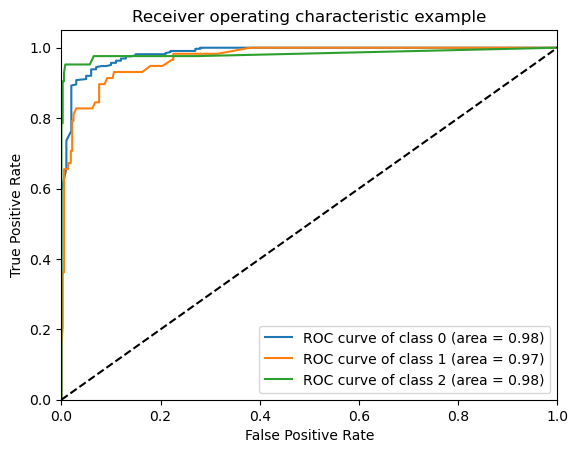

In [54]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 


# Plot ROC кривые
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Добавление случайной диагонали
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Метрики работы Recall, Precision, Weighted Accuracy, AUC

In [56]:
from sklearn.metrics import precision_recall_fscore_support

classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

y_pred = (y_score == y_score.max(axis=1)[:,None]).astype(int)

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

auc = roc_auc_score(y_test, y_score, multi_class='ovr')

print("Precision: ", precision)
print("Recall: ", recall)
print("AUC: ", auc)

accuracy = accuracy_score(y_test, y_pred)
print("Weighted Accuracy: ", accuracy)


Precision:  0.9424434917086499
Recall:  0.9436619718309859
AUC:  0.9793782735877897
Weighted Accuracy:  0.9436619718309859
